In [1]:
from google.colab import files
uploaded = files.upload()


Saving SEP28k.zip to SEP28k.zip


In [2]:
import os
from zipfile import ZipFile

# Get uploaded filename
zip_filename = list(uploaded.keys())[0]
extract_path = "audio_data"

with ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Files extracted to:", extract_path)


✅ Files extracted to: audio_data


In [3]:
# Walk through the unzipped folder and list all .wav files
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith(".wav"):
            print(os.path.join(root, file))


audio_data/SEP28k/HeStutters_1_28.wav
audio_data/SEP28k/MyStutteringLife_0_39.wav
audio_data/SEP28k/MyStutteringLife_6_17.wav
audio_data/SEP28k/MyStutteringLife_1_11.wav
audio_data/SEP28k/HeStutters_1_93.wav
audio_data/SEP28k/HeStutters_0_8.wav
audio_data/SEP28k/MyStutteringLife_4_2.wav
audio_data/SEP28k/HeStutters_1_37.wav
audio_data/SEP28k/HeStutters_1_73.wav
audio_data/SEP28k/MyStutteringLife_3_10.wav
audio_data/SEP28k/MyStutteringLife_4_31.wav
audio_data/SEP28k/MyStutteringLife_3_20.wav
audio_data/SEP28k/MyStutteringLife_5_38.wav
audio_data/SEP28k/MyStutteringLife_6_30.wav
audio_data/SEP28k/MyStutteringLife_4_38.wav
audio_data/SEP28k/HeStutters_1_14.wav
audio_data/SEP28k/HeStutters_1_44.wav
audio_data/SEP28k/MyStutteringLife_7_56.wav
audio_data/SEP28k/MyStutteringLife_2_33.wav
audio_data/SEP28k/HeStutters_1_22.wav
audio_data/SEP28k/HeStutters_1_6.wav
audio_data/SEP28k/HeStutters_0_39.wav
audio_data/SEP28k/HeStutters_1_41.wav
audio_data/SEP28k/MyStutteringLife_5_36.wav
audio_data/SE

In [4]:
import os

DATA_DIR = "audio_data/SEP28k"

normal_count = 1
stuttered_count = 1

for filename in os.listdir(DATA_DIR):
    if filename.endswith(".wav"):
        if "MyStutteringLife" in filename:
            new_name = f"normal_{normal_count:03d}.wav"
            normal_count += 1
        elif "HeStutters" in filename:
            new_name = f"stuttered_{stuttered_count:03d}.wav"
            stuttered_count += 1
        else:
            # Skip files that don't match either pattern
            continue

        src = os.path.join(DATA_DIR, filename)
        dst = os.path.join(DATA_DIR, new_name)
        os.rename(src, dst)

print("✅ Renaming completed!")


✅ Renaming completed!


In [5]:
import librosa
import numpy as np
import os

DATA_DIR = "audio_data/SEP28k"

def extract_features(file_path, max_pad_len=200):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    if pad_width > 0:
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_len]
    return mfccs

X = []
y = []

for filename in os.listdir(DATA_DIR):
    if filename.endswith(".wav"):
        label = 1 if filename.startswith("stuttered") else 0
        features = extract_features(os.path.join(DATA_DIR, filename))
        X.append(features)
        y.append(label)

X = np.array(X)
y = np.array(y)

print(f"✅ Extracted MFCC features for {len(X)} files")
print(f"Feature array shape: {X.shape}")
print(f"Labels shape: {y.shape}")


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning:

✅ Extracted MFCC features for 522 files
Feature array shape: (522, 40, 200)
Labels shape: (522,)


In [9]:
import numpy as np

# Get predicted probabilities and classes on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [6]:
# Assuming X is your MFCC feature array: (522, 40, 200)
X_reshaped = X.reshape(X.shape[0], -1)  # Shape becomes (522, 8000)
print("Reshaped MFCC shape for clustering:", X_reshaped.shape)


Reshaped MFCC shape for clustering: (522, 8000)


In [7]:
from sklearn.cluster import KMeans

cluster_results = {}

for n_clusters in [3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_reshaped)
    cluster_results[n_clusters] = labels
    print(f"Clustering done for k={n_clusters}")


Clustering done for k=3
Clustering done for k=4
Clustering done for k=5


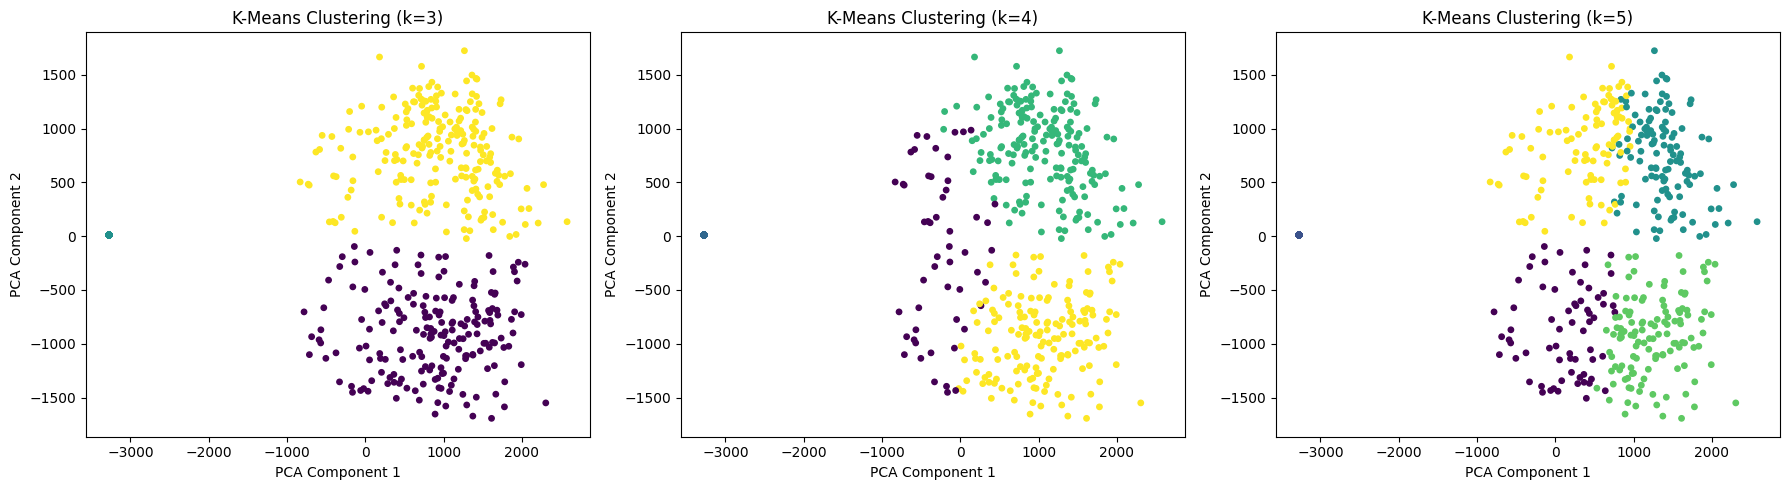

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reshaped)

plt.figure(figsize=(18, 5))
for i, k in enumerate([3, 4, 5]):
    plt.subplot(1, 3, i+1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_results[k], cmap='viridis', s=15)
    plt.title(f'K-Means Clustering (k={k})')
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

for k in [3, 4, 5]:
    df = pd.DataFrame({'Cluster': cluster_results[k], 'TrueLabel': y})
    print(f"\nCluster-Label Crosstab for k={k}")
    print(df.groupby(['Cluster', 'TrueLabel']).size().unstack(fill_value=0))



Cluster-Label Crosstab for k=3
TrueLabel    0    1
Cluster            
0          179   11
1            0  112
2          202   18

Cluster-Label Crosstab for k=4
TrueLabel    0    1
Cluster            
0           52    1
1            0  112
2          178   17
3          151   11

Cluster-Label Crosstab for k=5
TrueLabel    0    1
Cluster            
0           64    2
1            0  112
2          108   10
3          115    9
4           94    8


In [10]:
from sklearn.metrics import silhouette_score

for k in [3, 4, 5]:
    score = silhouette_score(X_reshaped, cluster_results[k])
    print(f"Silhouette Score for k={k}: {score:.4f}")


Silhouette Score for k=3: 0.3584
Silhouette Score for k=4: 0.3547
Silhouette Score for k=5: 0.2880


In [17]:
import librosa
import numpy as np
from google.colab import files

# === 1. Upload new audio file ===
uploaded = files.upload()

# === 2. Function to extract MFCC ===
def extract_mfcc(file_path, n_mfcc=40, max_pad_len=200):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    if mfcc.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]
    return mfcc.flatten().reshape(1, -1)

# === 3. Predict using existing kmeans object ===
for filename in uploaded.keys():
    mfcc_input = extract_mfcc(filename)
    cluster = kmeans.predict(mfcc_input)[0]

    # Interpret cluster
    cluster_meaning = {
        0: "Normal Voice",
        1: "Mild Stuttering",
        2: "Severe Stuttering"
    }

    print(f"\n🎧 File: {filename}")
    print(f"🔎 Predicted Cluster: {cluster} → {cluster_meaning.get(cluster, 'Unknown')}")


Saving HeStutters_0_2.wav to HeStutters_0_2.wav

🎧 File: HeStutters_0_2.wav
🔎 Predicted Cluster: 1 → Mild Stuttering


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
